In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import special
import scipy.constants as const
import scipy.integrate as integrate
from scipy.integrate import quad

$$dW_\mathrm{QED} = \frac{\alpha mc^2}{\sqrt{3}\pi\hbar\gamma} \left[ \left(1-\xi+ \frac{1}{1-\xi} \right)K_{2/3}(\delta) - \int_\delta^\infty K_{1/3}(s)ds  \right] d\xi$$
$$dP_\mathrm{QED} = \frac{\hbar\omega}{mc^2} dW_\mathrm{QED}=\frac{\alpha mc^2}{\sqrt{3}\pi\hbar} \left[ \left(1-\xi+ \frac{1}{1-\xi} \right)K_{2/3}(\delta) - \int_\delta^\infty K_{1/3}(s)ds  \right] \xi d\xi$$
$$\delta=\frac{2\xi}{3\chi(1-\xi)};\,\xi=\frac{\hbar\omega}{\gamma mc^2}$$

$$ P_\mathrm{QED} = \frac{\alpha mc^2}{\sqrt{3}\pi\hbar}  \int_0^1 f_e(\xi,\chi)\xi d\xi$$

$$ f_e(\xi,\chi) = \left(1-\xi+ \frac{1}{1-\xi} \right)K_{2/3}(\delta) - \int_\delta^\infty K_{1/3}(s)ds $$


The coefficient is $\frac{\alpha mc^2}{\sqrt{3}\pi\hbar}$; $\mathrm{diffQ} = f_e(\xi,\chi)\xi$; $\mathrm{diffR} = f_e(\xi,\chi)$

In [2]:
coefficient = (const.fine_structure)*(const.m_e*const.c**2)/(np.sqrt(3)*const.pi*const.hbar)
print(coefficient)

1.041139850816157e+18


In [3]:
def intBessel13(ss):
    return integrate.quad(lambda ss: special.kv(1/3, ss), ss, np.inf)[0]

def dPQED(Xi,Xe):
    ss = (2/3)*Xi/((1-Xi)*Xe)
    ff = special.kv(2/3, ss)
    hh = intBessel13(ss)
    fcem = Xi*( ((1 - Xi) + 1/(1-Xi))*ff - hh )  # diffQ(Xi,xe)
    dcem = ( ((1 - Xi) + 1/(1-Xi))*ff - hh )     # diffR(Xi,xe)
    return fcem, dcem

In [4]:
diffQED = np.zeros([3000,2])
XiQED = np.zeros(3000)
for ii in range(1,3000,1):
    Xi = (ii-0.5)/3000
    XiQED[ii] = Xi
    diffQED[ii,0] = dPQED(Xi,1.93)[0]            # test diffQ(Xi,xe) at Xe=1.93
    diffQED[ii,1] = dPQED(Xi,1.93)[1]            # test diffR(Xi,xe) at Xe=1.93

<ipython-input-5-060b011f4a54>:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


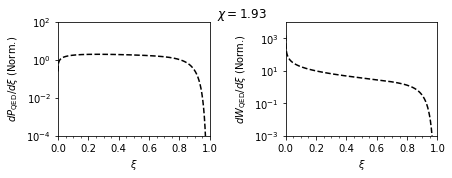

In [5]:
fig, axs = plt.subplots(1,2,
                       gridspec_kw={'wspace':0.5})

(ax1, ax2) = axs
fig.suptitle(r'$\chi=1.93$')

ax1.semilogy(XiQED[1:],diffQED[1:,0],color='black',ls='--')
ax1.set(xlabel=r'$\xi$', 
        ylabel=r'$dP_\mathrm{QED}/d\xi $ (Norm.)',
        xlim=(0,1),
        ylim=(1e-4,1e2),
       )
ax1.minorticks_on()

ax2.semilogy(XiQED[1:],diffQED[1:,1],color='black',ls='--')
ax2.set(xlabel=r'$\xi$',
        ylabel=r'$dW_\mathrm{QED}/d\xi $ (Norm.)',
        xlim=(0,1),
        ylim=(1e-3,1e4),
       )
ax2.minorticks_on()
fig.set_size_inches(3.4*2,3.4/1.618)
fig.tight_layout()
plt.show()

In [6]:
EmaxV= 1000.0
we0 =(np.log(EmaxV)-np.log(0.001))/199.0
totalQED = np.zeros([200,2])
XeQED = np.zeros(200)
for jj in range(1,200,1): # Xe
    Xe = np.exp(we0*(jj-1))*0.001
    XeQED [jj] = Xe
    totalQED[jj,0] = integrate.quad(lambda x: dPQED(x,Xe)[0], 0, 1)[0] # totalR(xe), put into array
    totalQED[jj,1] = integrate.quad(lambda x: dPQED(x,Xe)[1], 0, 1)[0] # totalS(xe), put into array

<ipython-input-3-c40af26edcc6>:2: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(lambda ss: special.kv(1/3, ss), ss, np.inf)[0]


<ipython-input-7-3a3668aff039>:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


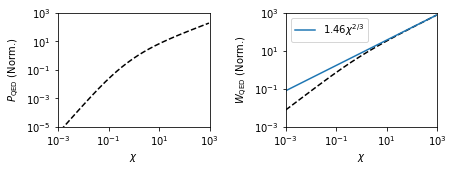

In [7]:
fig, axs = plt.subplots(1,2,
                       gridspec_kw={'wspace':0.5})

(ax1, ax2) = axs

ax1.plot(XeQED,totalQED[:,0],color='black',ls='--')
ax1.set(xlabel=r'$\chi$')
ax1.set(ylabel=r'$P_\mathrm{QED}$ (Norm.)')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(xmin=1e-3,xmax=1e3)
ax1.set_ylim(ymin=1e-5,ymax=1e3)
ax1.minorticks_on()

ax2.plot(XeQED,totalQED[:,1],color='black',ls='--')
ax2.plot(XeQED,1.46*XeQED**(2/3)*5.44,label=r'$1.46\chi^{2/3}$') # 5.44 = sqrt(3)*π
ax2.set(xlabel=r'$\chi$')
ax2.set(ylabel=r'$W_\mathrm{QED}$ (Norm.)')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlim(xmin=1e-3,xmax=1e3)
ax2.set_ylim(ymin=1e-3,ymax=1e3)
ax2.minorticks_on()
ax2.legend()
fig.set_size_inches(3.4*2,3.4/1.618)
fig.tight_layout()
plt.show()

# Classical limit, $\hbar\rightarrow 0$
$$dW_\mathrm{cl} = \frac{\alpha mc^2}{\sqrt{3}\hbar\pi\gamma} \left[   2K_{2/3}(\delta) - \int_\delta^\infty K_{1/3}(s)ds  \right] d\xi $$

$$dP_\mathrm{cl}  = \frac{\hbar\omega}{mc^2} dW_\mathrm{cl}= \frac{\alpha mc^2}{\sqrt{3}\pi\hbar}  \left[   2K_{2/3}(\delta) - \int_\delta^\infty K_{1/3}(s)ds  \right] \xi d\xi$$
$$\delta=\frac{2\xi}{3\chi}$$

$$ P_\mathrm{cl} = \frac{\alpha mc^2}{\sqrt{3}\pi\hbar}  \int_0^\infty f_e(\xi,\chi)\xi d\xi$$

$$ f_e(\xi,\chi) = 2K_{2/3}(\delta) - \int_\delta^\infty K_{1/3}(s)ds = \int_\delta^\infty K_{5/3}(s)ds $$

In [8]:
def intBessel13(ss):
    return integrate.quad(lambda ss: special.kv(1/3, ss), ss, np.inf)[0]

def dPcl(Xi,Xe):
    ss = (2/3)*Xi/Xe
    ff = special.kv(2/3, ss)
    hh = intBessel13(ss)
    fcem = Xi*(2*ff-hh) 
    dcem = (2*ff-hh) 
    return fcem, dcem               # diffC(Xi,Xe), diffD(Xi,Xe) in classical limit

diffCl = np.zeros([6000,2])
Xcl= np.zeros(6000)
for ii in range(1,6000,1):
    Xi = (ii-0.5)/3000
    Xcl[ii] = Xi
    diffCl[ii,0] = dPcl(Xi,1.0e-3)[0]    # test diffC(Xi,Xe) at Xe=0.001
    diffCl[ii,1] = dPcl(Xi,1.0e-3)[1]    # test diffD(Xi,Xe) at Xe=0.001

<ipython-input-9-d329fdbdfd8f>:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


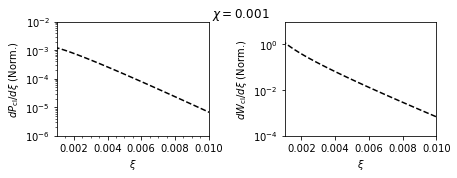

In [9]:
fig, axs = plt.subplots(1,2,
                       gridspec_kw={'wspace':0.5})

(ax1, ax2) = axs
fig.suptitle(r'$\chi=0.001$')

ax1.plot(Xcl,diffCl[:,0],color='black',ls='--')
ax1.set(xlabel=r'$\xi$')
ax1.set(ylabel=r'$dP_\mathrm{cl}/d\xi $ (Norm.)')
ax1.set_yscale('log')
ax1.set_xlim(xmin=0.001,xmax=0.01)
ax1.set_ylim(ymin=1e-6,ymax=1e-2)
ax1.minorticks_on()

ax2.plot(Xcl,diffCl[:,1],color='black',ls='--')
ax2.set(xlabel=r'$\xi$')
ax2.set(ylabel=r'$dW_\mathrm{cl}/d\xi $ (Norm.)')
ax2.set_yscale('log')
ax2.set_xlim(xmin=0.001,xmax=0.01)
ax2.set_ylim(ymin=1e-4,ymax=1e1)
fig.set_size_inches(3.4*2,3.4/1.618)
fig.tight_layout()
plt.show()

In [10]:
def intBessel53(Xi,Xe):
    ss = (2/3)*Xi/Xe
    return integrate.quad(lambda ss: special.kv(5/3, ss), ss, np.inf)[0]            

X = np.linspace(0.001,1000,200)
totalCl = np.zeros([200,2])
for jj in range(1,200,1): # Xe
    Xe = np.exp(we0*(jj-1))*0.001
    X[jj] = Xe
    totalCl[jj,0] = integrate.quad(lambda Xi: Xi*intBessel53(Xi,Xe), 0, np.inf)[0]
    totalCl[jj,1] = integrate.quad(lambda Xi: intBessel53(Xi,Xe), 0, np.inf)[0]

<ipython-input-10-4a275972304e>:3: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(lambda ss: special.kv(5/3, ss), ss, np.inf)[0]
<ipython-input-10-4a275972304e>:11: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  totalCl[jj,1] = integrate.quad(lambda Xi: intBessel53(Xi,Xe), 0, np.inf)[0]
<ipython-input-10-4a275972304e>:3: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(lambda ss: special.kv(5/3, ss), ss, np.inf)[0]
<ipython-input-10-4a275972304e>:11: IntegrationWarning: The maximu

<ipython-input-11-5835c509f252>:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


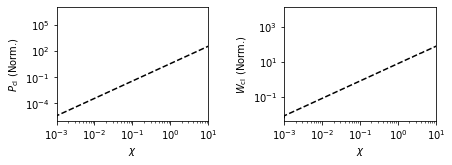

In [11]:
fig, axs = plt.subplots(1,2,
                       gridspec_kw={'wspace':0.5})

(ax1, ax2) = axs

ax1.plot(X,totalCl[:,0],color='black',ls='--')
ax1.set(xlabel=r'$\chi$')
ax1.set(ylabel=r'$P_\mathrm{cl}$ (Norm.)')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(xmin=1e-3,xmax=1e1)
ax1.minorticks_on()

ax2.plot(X,totalCl[:,1],color='black',ls='--')
ax2.set(xlabel=r'$\chi$')
ax2.set(ylabel=r'$W_\mathrm{cl}$ (Norm.)')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlim(xmin=1e-3,xmax=1e1)
ax2.minorticks_on()
fig.set_size_inches(3.4*2,3.4/1.618)
fig.tight_layout()
plt.show()

In principle $g(\chi)=P_\mathrm{QED}/P_\mathrm{cl}$. In (Erber 1966; Sokolov and Ternov 1968; Blackburn 2020), it is

$$g(\chi)=\frac{9\sqrt{3}}{8\pi} \int_0^\infty \left[ \frac{2u^2K_{5/3}(u)}{(2+3\chi u)^2} + \frac{36\chi^2u^3K_{2/3}(u)}{(2+3\chi u)^4} \right] du$$

The assymtopic expression is
$$ g(\chi_e\ll 1)\approx1-\frac{55}{16}\sqrt(3)\chi + 48\chi^2 $$
$$ g(\chi_e\gg 1)\approx\frac{48}{243}\Gamma(\frac{2}{3})\chi^{-4/3} \times \left[ 1 -\frac{81}{16\Gamma(2/3)}(3\chi)^{-2/3} \right] $$

The analytic approximation to $g(\chi)$ is
$$g(\chi)= \left[ 1 + 4.8(1+\chi)\ln(1+1.7\chi) +2.44\chi^2)^{-2/3} \right]$$

The coef is $\frac{9\sqrt{3}}{8\pi}$

In [12]:
def assymp1(x):
    return 1-(55/16)*np.sqrt(3)*x + 48*x**2

def assymp2(x):
    return (48/243)*1.354*2.08*x**(-4/3)*(1-(81/16)*0.73855*(3*x)**(-2/3))

def assymp3(x):
    return ( 1 + 4.8*(1+x)*np.log(1+1.7*x) +2.44*x**2)**(-2/3)

In [13]:
def dg(u,Xe):
    ff = 2*u**2* special.kv(5/3, u)/(2+3*Xe*u)**2 
    hh = 36*Xe**2*u**3*special.kv(2/3, u)/(2+3*Xe*u)**4 
    return ff+hh

coef = 9*np.sqrt(3)/(8*const.pi)
EmaxV= 1000.0
we0 =(np.log(EmaxV)-np.log(0.001))/199.0 
totalG = np.zeros(200)
for jj in range(1,200,1): # Xe
    Xe = np.exp(we0*(jj-1))*0.001
    totalG[jj] = integrate.quad(dg,0,np.inf,args=(Xe,))[0]*coef

<ipython-input-14-9b30c018f62a>:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


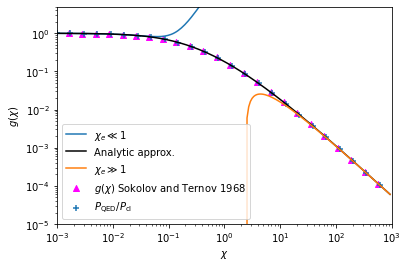

In [14]:
plt.scatter(X[::8],totalG[::8],marker='^',color='magenta',
        label=r'$g(\chi)$ Sokolov and Ternov 1968')

plt.scatter(X[1::8],totalQED[1::8,0]/totalCl[1::8,0],label=r'$P_\mathrm{QED}/P_\mathrm{cl}$',marker='+')

plt.plot(X,assymp1(X), label=r'$\chi_e\ll 1$')

plt.plot(X,assymp3(X), label='Analytic approx.',color='black')

plt.plot(X,assymp2(X), label=r'$\chi_e\gg 1$')


plt.yscale('log')
plt.xscale('log')
plt.xlim(xmin=0.001,xmax=1000)
plt.ylim(ymin=1e-5,ymax=5.0e0)

plt.xlabel(r'$\chi$')
plt.ylabel(r'$g(\chi)$')
plt.legend(loc='best')
plt.minorticks_on()
plt.legend(loc='best')

fig.set_size_inches(3.4*2,3.4/1.618)
fig.tight_layout()
plt.show()

$$\frac{P_\mathrm{QED}}{P_\mathrm{cl}} = \frac{9\sqrt{3}}{8\pi} \int_0^\infty \left[ \frac{2u^2K_{5/3}(u)}{(2+3\chi u)^2} + \frac{36\chi^2u^3K_{2/3}(u)}{(2+3\chi u)^4} \right] du$$


In [15]:
diff = np.zeros([3000,8])
Xi = np.zeros(3000)
for ii in range(1,3000,1):
    X = (ii-0.5)/3000
    Xi[ii] = X
    diff[ii,0] = dPQED(X,1.0e-2)[0]       # test at Xe=1.0e-3
    diff[ii,1] = dPcl(X,1.0e-2)[0]       
    diff[ii,2] = dPQED(X,1)[0]            # test at Xe=1.0
    diff[ii,3] = dPcl(X,1)[0]      
    diff[ii,4] = dPQED(X,10)[0]           # test at Xe=10
    diff[ii,5] = dPcl(X,10)[0]       
    diff[ii,6] = dPQED(X,100)[0]          # test at Xe=100
    diff[ii,7] = dPcl(X,100)[0]      

<ipython-input-16-6936b20dc204>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


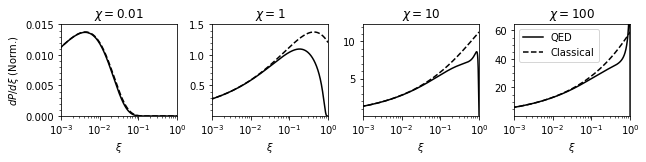

In [16]:
fig, axs = plt.subplots(1,4,sharex=True,
                       gridspec_kw={'wspace':0.3})

(ax1, ax2, ax3, ax4) = axs

ax1.plot(Xi[1:],diff[1:,0],color='black')
ax1.plot(Xi[1:],diff[1:,1],color='black',ls='--')
ax1.set(ylim=(1e-12,diff[1:,1].max()*1.1),
        ylabel=r'$dP/d\xi $ (Norm.)',
        title =r'$\chi=0.01$',
       )

ax2.plot(Xi[1:],diff[1:,2],color='black')
ax2.plot(Xi[1:],diff[1:,3],color='black',ls='--')
ax2.set(ylim=(1e-8,diff[1:,3].max()*1.1),
        title =r'$\chi=1$',
       )

ax3.plot(Xi[1:],diff[1:,4],color='black')
ax3.plot(Xi[1:],diff[1:,5],color='black',ls='--')
ax3.set(ylim=(1e-8,diff[1:,5].max()*1.1),
        title =r'$\chi=10$',
       )

ax4.plot(Xi[1:],diff[1:,6],color='black',label='QED')
ax4.plot(Xi[1:],diff[1:,7],color='black',ls='--',label='Classical')
ax4.set(ylim=(1e-2,diff[1:,7].max()*1.1),
        title =r'$\chi=100$',
       )
ax4.legend(loc='upper left')

for ax in axs.flat:
    ax.set(xlim=(1e-3,1e0),
           xlabel=r'$\xi$',
           xscale='log',
           #yscale='log',
          )
    ax.minorticks_on()

fig.set_size_inches(3.4*3,3.4/2)
fig.tight_layout()
plt.show()

In [17]:
#EmaxV= 1000.0
#we0 =(np.log(EmaxV)-np.log(0.001))/199.0
#totalR = np.zeros([200])
#totalS = np.zeros([200])
#totalC = np.zeros([200])
#totalT = np.zeros([200])
#diffQ = np.zeros([3000+2,200])
#diffR = np.zeros([3000+2,200])
#diffC = np.zeros([3000+2,200])
#diffD = np.zeros([3000+2,200])

#for jj in range(1,200,1): # Xe
#    Xe = np.exp(we0*(float(jj)-1))*0.001
#    for ii in range(1,3000,1):
#        Xi = (float(ii)-0.5)/3000
#        diffQ[ii,jj] = dPQED(Xi,Xe)[0]
#        diffR[ii,jj] = dPQED(Xi,Xe)[1]
#        diffC[ii,jj] = dPcl(Xi,Xe)[0]
#        diffD[ii,jj] = dPcl(Xi,Xe)[1]
#    totalR[jj] = integrate.quad(lambda x: dPQED(x,Xe)[0], 0, 1)[0] 
#    totalS[jj] = integrate.quad(lambda x: dPQED(x,Xe)[1], 0, 1)[0]
#    totalC[jj] = integrate.quad(lambda Xi: Xi*intBessel53(Xi,Xe), 0, np.inf)[0]
#    totalT[jj] = integrate.quad(lambda Xi: intBessel53(Xi,Xe), 0, np.inf)[0] 

# Pair production

$$dW_\mathrm{p} = \frac{\alpha mc^2}{\sqrt{3}\pi\hbar}\left(\frac{mc^2}{\epsilon_h} \right) \left[ \left(\frac{\eta_+}{\eta_-} + \frac{\eta_-}{\eta_+} \right)K_{2/3}(\delta) + \int_\delta^\infty K_{1/3}(s)ds  \right] d\eta_-$$
$$dW_\mathrm{p}=\frac{\alpha mc^2}{\sqrt{3}\pi\hbar} \left(\frac{mc^2}{\epsilon_h} \right) \left[ \left(\frac{\eta_+}{\eta_-} + \frac{\eta_-}{\eta_+} \right)K_{2/3}(\delta) + \int_\delta^\infty K_{1/3}(s)ds  \right] d\eta_-$$

$$dW_\mathrm{p}=\frac{\alpha mc^2}{\sqrt{3}\pi\hbar} \left(\frac{mc^2}{\epsilon_h} \right) f_p(\eta_-,\chi) d\eta_-$$

$$\delta=\frac{2}{3\eta_-\eta_+\chi};\,\eta_-=\frac{\epsilon_e}{\epsilon_h};\,\eta_+=1-\eta_- $$

$$ f_p(\eta_-,\chi) = \left[ \left(\frac{\eta_+}{\eta_-} + \frac{\eta_-}{\eta_+} \right)K_{2/3}(\delta) + \int_\delta^\infty K_{1/3}(s)ds  \right] $$

In [18]:
def intBessel13(ss):
    return integrate.quad(lambda ss: special.kv(1/3, ss), ss, np.inf)[0]

def dWpair(Xi,Xe):
    ss = (2/3)/(Xi*(1-Xi)*Xe)
    ff = special.kv(2/3, ss)
    hh = intBessel13(ss)
    dcpr = ( ( (1-Xi)/Xi + Xi/(1-Xi)  )*ff - hh )     # dWpair(Xi,Xe)=f_p(\eta,\chi); Xi = \eta_-, Xe = \chi
    return dcpr

In [19]:
diffW = np.zeros(3000)
Xipair = np.zeros(3000)
for ii in range(1,3000,1):
    Xi = (ii-0.5)/3000
    Xipair[ii] = Xi
    diffW[ii] = dWpair(Xi,0.5)           # differential at \chi = 0.5

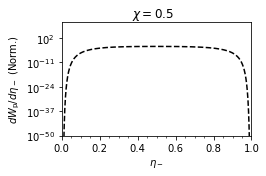

In [20]:
fig, ax1 = plt.subplots()

ax1.plot(Xipair[1:],diffW[1:],color='black',ls='--')
fig.suptitle(r'$\chi=0.5$')
ax1.set(xlabel=r'$\eta_-$')
ax1.set(ylabel=r'$dW_\mathrm{p}/d\eta_- $ (Norm.)')
ax1.set_yscale('log')
ax1.set_xlim(xmin=0,xmax=1)
ax1.set_ylim(ymin=1e-50)
ax1.minorticks_on()

fig.set_size_inches(3.4,3.4/1.618)

In [21]:
EmaxV= 1000.0
wp0 =(np.log(EmaxV)-np.log(0.001))/199.0
totalPair = np.zeros(200)
XePair = np.zeros(200)
for jj in range(1,200,1): # Xe
    Xe = np.exp(wp0*(jj-1))*0.001
    XePair[jj] = Xe
    totalPair[jj] = integrate.quad(lambda x: dWpair(x,Xe), 0, 1)[0] # integrate \eta

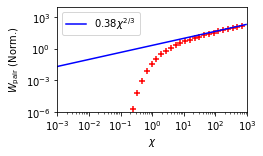

In [22]:
fig, ax1 = plt.subplots()

ax1.scatter(XePair[::5],totalPair[::5],color='red',marker='+')
ax1.plot(XePair,0.38*XePair**(2/3)*5.44,color='blue',label=r'$0.38\chi^{2/3}$') # 5.44 = sqrt(3)*π
ax1.set(xlabel=r'$\chi$')
ax1.set(ylabel=r'$W_\mathrm{pair}$ (Norm.)')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(xmin=1e-3,xmax=1e3)
ax1.set_ylim(ymin=1e-6,ymax=1e4)
ax1.legend(loc='best')
ax1.minorticks_on()

fig.set_size_inches(3.4,3.14/1.618)